In this notebook is reported the analysis step by step.

Import the library necessary for the analysis and the data

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd


df_analysis=pd.read_csv("./data/DATA_EDA_clean.csv")
df_analysis

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,1,0.0,3,...,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13
1,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,...,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09
2,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,...,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09
3,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,...,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18
4,1230000.0,7237550310,4.0,4.50,5420.0,101930.0,1.0,0,0.0,3,...,3890.0,1530.0,2001,0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17693,360000.0,263000018,3.0,2.50,1530.0,1131.0,3.0,0,0.0,3,...,1530.0,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21
17694,400000.0,6600060120,4.0,2.50,2310.0,5813.0,2.0,0,0.0,3,...,2310.0,0.0,2014,0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23
17695,402101.0,1523300141,2.0,0.75,1020.0,1350.0,2.0,0,0.0,3,...,1020.0,0.0,2009,0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23
17696,400000.0,291310100,3.0,2.50,1600.0,2388.0,2.0,1,0.0,3,...,1600.0,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16


In [2]:
df_analysis.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.769800e+04,1.769800e+04,17698.000000,17698.000000,17698.000000,1.769800e+04,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000,17698.000000
mean,5.406358e+05,4.588336e+09,3.378404,2.121130,2084.372641,1.527142e+04,1.496214,0.117132,0.232512,3.410837,7.662674,1791.951689,292.420952,1971.139338,83.793423,98077.712453,47.559435,-122.213379,1990.129732,12854.134535
std,3.677709e+05,2.876690e+09,0.932266,0.767113,916.513070,4.206568e+04,0.538628,0.321586,0.762614,0.652032,1.169438,826.589740,443.384773,29.344582,400.304560,53.480367,0.138536,0.140898,684.720979,27694.496055
min,8.000000e+04,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.220000e+05,2.126049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469500,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.905030e+09,3.000000,2.250000,1920.000000,7.603500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571150,-122.229000,1840.000000,7620.000000
75%,6.450000e+05,7.334401e+09,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677300,-122.124000,2370.000000,10095.000000
max,7.700000e+06,9.895000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17698 non-null  float64
 1   id             17698 non-null  int64  
 2   bedrooms       17698 non-null  float64
 3   bathrooms      17698 non-null  float64
 4   sqft_living    17698 non-null  float64
 5   sqft_lot       17698 non-null  float64
 6   floors         17698 non-null  float64
 7   waterfront     17698 non-null  int64  
 8   view           17698 non-null  float64
 9   condition      17698 non-null  int64  
 10  grade          17698 non-null  int64  
 11  sqft_above     17698 non-null  float64
 12  sqft_basement  17698 non-null  float64
 13  yr_built       17698 non-null  int64  
 14  yr_renovated   17698 non-null  int64  
 15  zipcode        17698 non-null  int64  
 16  lat            17698 non-null  float64
 17  long           17698 non-null  float64
 18  sqft_l

In [4]:
df_analysis['zipcode'] = df_analysis['zipcode'].round().astype(str)
df_analysis['waterfront'] = df_analysis['waterfront'].round().astype(str)
df_analysis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17698 non-null  float64
 1   id             17698 non-null  int64  
 2   bedrooms       17698 non-null  float64
 3   bathrooms      17698 non-null  float64
 4   sqft_living    17698 non-null  float64
 5   sqft_lot       17698 non-null  float64
 6   floors         17698 non-null  float64
 7   waterfront     17698 non-null  object 
 8   view           17698 non-null  float64
 9   condition      17698 non-null  int64  
 10  grade          17698 non-null  int64  
 11  sqft_above     17698 non-null  float64
 12  sqft_basement  17698 non-null  float64
 13  yr_built       17698 non-null  int64  
 14  yr_renovated   17698 non-null  int64  
 15  zipcode        17698 non-null  object 
 16  lat            17698 non-null  float64
 17  long           17698 non-null  float64
 18  sqft_l

Client request:“Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible.”

Based on her request it is necessary to determinate the price per total square foot

The total square foot is defined as the sum of the sqft_lot and sqft_living ( the sqft_living contains also the sqft basement)

Define new column tot_sqft

In [5]:
df_analysis['tot_sqft'] = df_analysis['sqft_living'] + df_analysis['sqft_lot']
df_analysis

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,tot_sqft
0,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,1,0.0,3,...,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,6830.0
1,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,...,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,9812.0
2,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,...,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,6960.0
3,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,...,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,9760.0
4,1230000.0,7237550310,4.0,4.50,5420.0,101930.0,1.0,0,0.0,3,...,1530.0,2001,0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,107350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17693,360000.0,263000018,3.0,2.50,1530.0,1131.0,3.0,0,0.0,3,...,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,2661.0
17694,400000.0,6600060120,4.0,2.50,2310.0,5813.0,2.0,0,0.0,3,...,0.0,2014,0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,8123.0
17695,402101.0,1523300141,2.0,0.75,1020.0,1350.0,2.0,0,0.0,3,...,0.0,2009,0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,2370.0
17696,400000.0,291310100,3.0,2.50,1600.0,2388.0,2.0,1,0.0,3,...,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,3988.0


Now it is important to determinate the price per square foot as it can be used as normalised criteria.

In [6]:
df_analysis['price_per_sqft'] = df_analysis['price'] / df_analysis['sqft_living']
df_analysis

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,tot_sqft,price_per_sqft
0,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,1,0.0,3,...,1955,0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,6830.0,188.050847
1,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,...,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,9812.0,209.338521
2,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,...,1965,0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,6960.0,308.163265
3,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,...,1987,0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,9760.0,303.571429
4,1230000.0,7237550310,4.0,4.50,5420.0,101930.0,1.0,0,0.0,3,...,2001,0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,107350.0,226.937269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17693,360000.0,263000018,3.0,2.50,1530.0,1131.0,3.0,0,0.0,3,...,2009,0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,2661.0,235.294118
17694,400000.0,6600060120,4.0,2.50,2310.0,5813.0,2.0,0,0.0,3,...,2014,0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,8123.0,173.160173
17695,402101.0,1523300141,2.0,0.75,1020.0,1350.0,2.0,0,0.0,3,...,2009,0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,2370.0,394.216667
17696,400000.0,291310100,3.0,2.50,1600.0,2388.0,2.0,1,0.0,3,...,2004,0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,3988.0,250.000000


A plot can help better understand the price per sqft distribution respect the zipcode.

<Axes: xlabel='zipcode', ylabel='price_per_sqft'>

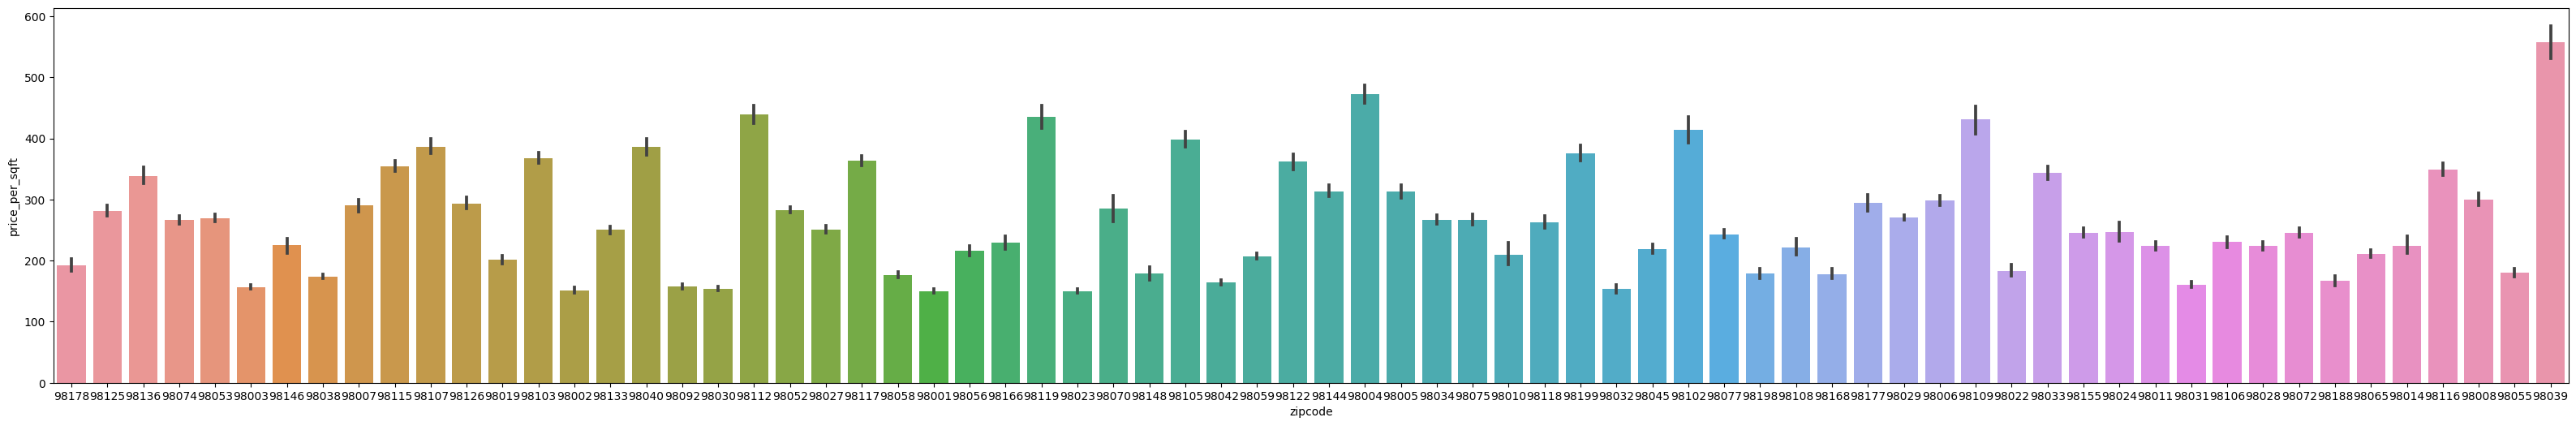

In [7]:
plt.figure(figsize=(40, 6))  # Set width=10, height=6 (in inches)

sns.barplot(df_analysis,x='zipcode', y='price_per_sqft',  )

<Axes: xlabel='zipcode', ylabel='price_per_sqft'>

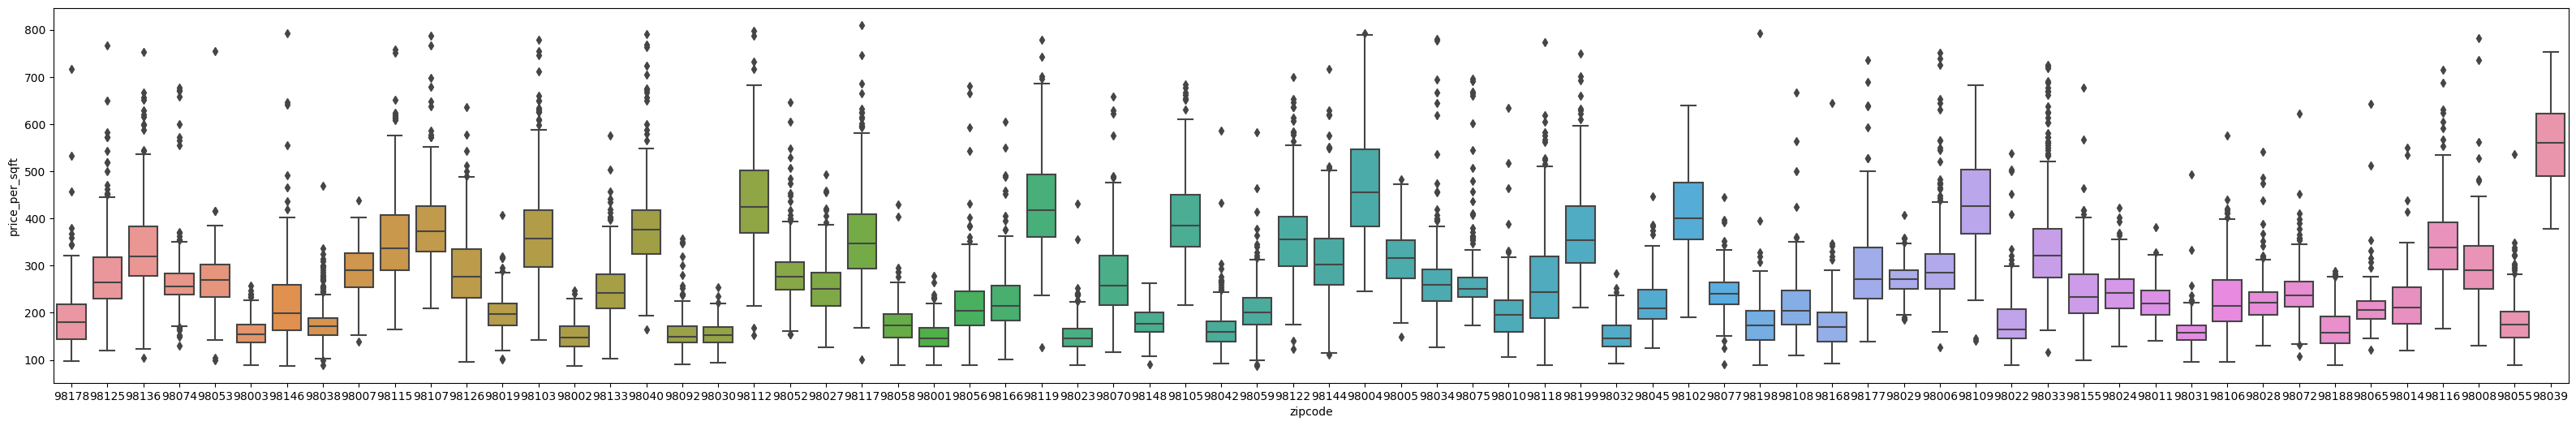

In [8]:
plt.figure(figsize=(40, 6))  # Set width=10, height=6 (in inches)
sns.boxplot(df_analysis, x='zipcode', y='price_per_sqft')

<Axes: >

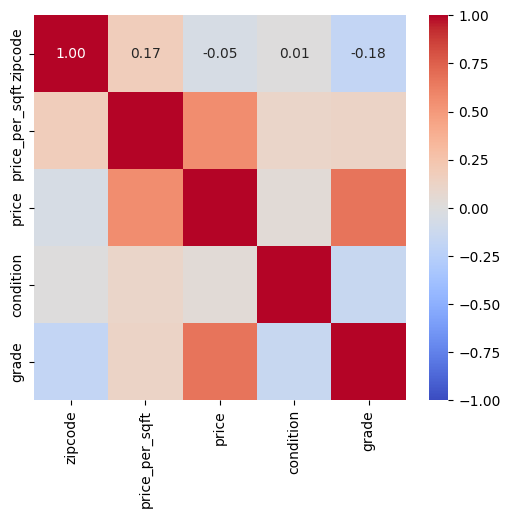

In [9]:
plt.figure(figsize=(6,5),dpi=100)
sns.heatmap(df_analysis[['zipcode','price_per_sqft', 'price', 'condition', 'grade']].corr(), annot=True, fmt='.2f',cmap='coolwarm', vmin=-1,vmax=1)

Now we have information about the distribution of the price per square foot and zipcode. 

We must identify those that are relatively cheap. From the Boxplot it can be observed that the price per sqft shows a common range between all zipcode. 

Therefore we need to identifies the poorest neighborhood: by considering the median value (so that outlier do not affect my analysis) and sorting them, it is possible to define the poorest neighborhood

We define the poorest as the one below a threshold value that we assume to be the bottom 25% of the zip

In [10]:
# by group by the zipcode and the price per sqft, we extrapolate the median and we sort them
zip_prices = df_analysis.groupby('zipcode')['price_per_sqft'].median().sort_values()
zip_prices

zipcode
98023    144.928389
98001    145.954339
98032    146.205357
98002    147.534785
98092    149.796235
            ...    
98119    417.647059
98112    424.581276
98109    426.482770
98004    454.632491
98039    560.324024
Name: price_per_sqft, Length: 70, dtype: float64

In [11]:
#definition of the threshold
threshold=zip_prices.quantile(0.25)

# refining the data set so it will consider only the data below this value
poor_zipcodes=zip_prices[zip_prices<threshold].index.tolist() # it creates a list of the poor zipcode
poor_zipcodes

['98023',
 '98001',
 '98032',
 '98002',
 '98092',
 '98030',
 '98003',
 '98031',
 '98188',
 '98042',
 '98022',
 '98168',
 '98038',
 '98058',
 '98198',
 '98055',
 '98148',
 '98178']

Now that we have the list of the poor_zipcode, we need to collect the other information from the data frame. Now we can associate to the house having this zipcode the poor_zipcode attribute

In [12]:
df_analysis['poor_neighborhood'] = df_analysis['zipcode'].isin(poor_zipcodes) #define a new colone with values true or false indicating it belongs to a poor zipcode
df_analysis


,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,tot_sqft,price_per_sqft,poor_neighborhood
0,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,1,0.0,3,...,0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,6830.0,188.050847,True
1,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,...,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,9812.0,209.338521,False
2,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,...,0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,6960.0,308.163265,False
3,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,...,0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,9760.0,303.571429,False
4,1230000.0,7237550310,4.0,4.50,5420.0,101930.0,1.0,0,0.0,3,...,0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,107350.0,226.937269,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17693,360000.0,263000018,3.0,2.50,1530.0,1131.0,3.0,0,0.0,3,...,0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,2661.0,235.294118,False
17694,400000.0,6600060120,4.0,2.50,2310.0,5813.0,2.0,0,0.0,3,...,0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,8123.0,173.160173,False
17695,402101.0,1523300141,2.0,0.75,1020.0,1350.0,2.0,0,0.0,3,...,0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,2370.0,394.216667,False
17696,400000.0,291310100,3.0,2.50,1600.0,2388.0,2.0,1,0.0,3,...,0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,3988.0,250.000000,False


<Axes: xlabel='year_sold', ylabel='price'>

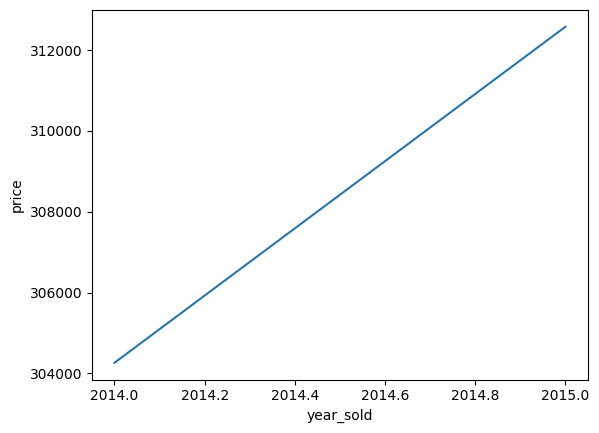

In [13]:
df_analysis['year_sold'] = pd.to_datetime(df_analysis['date']).dt.year
sns.lineplot(data=df_analysis[df_analysis['zipcode'].isin(poor_zipcodes)],
             x='year_sold', y='price', estimator='mean', ci=None)


Since the client is looking for buying and to selling, we need to determinate what houses could be renovated and sold at higher price.

The house condition should be low and and have a low grade too. They must be old and not being renovated.

In [14]:
candidates = df_analysis[               #it creates a new data frame with the following conditions
    (df_analysis['poor_neighborhood']) &
    (df_analysis['condition'] <= 3) &  # Slightly lower condition
    (df_analysis['grade'] <= 7) &      # Modest homes
    (df_analysis['price'] < df_analysis['price'].quantile(0.3)) & # Cheap relative to rest
    (df_analysis['yr_renovated'] == 0)  #no renovation
]
candidates

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,tot_sqft,price_per_sqft,poor_neighborhood,year_sold
0,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,1,0.0,3,...,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,6830.0,188.050847,True,2014
5,257500.0,1321400060,3.0,2.25,1715.0,6819.0,2.0,0,0.0,3,...,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,8534.0,150.145773,True,2014
7,323000.0,3793500160,3.0,2.50,1890.0,6560.0,2.0,0,0.0,3,...,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,8450.0,170.899471,True,2015
28,322500.0,7955080270,4.0,2.75,2060.0,6659.0,1.0,0,0.0,3,...,98058,47.4276,-122.157,2020.0,8720.0,2014-12-03,8719.0,156.553398,True,2014
32,240000.0,7895500070,4.0,1.00,1220.0,8075.0,1.0,0,0.0,2,...,98001,47.3341,-122.282,1290.0,7800.0,2015-02-13,9295.0,196.721311,True,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17588,249000.0,121039156,3.0,1.00,1030.0,24750.0,1.0,0,2.0,3,...,98023,47.3343,-122.362,2810.0,28800.0,2015-01-09,25780.0,241.747573,True,2015
17630,290000.0,1760650820,3.0,2.25,1610.0,3764.0,2.0,0,0.0,3,...,98042,47.3589,-122.083,1610.0,3825.0,2015-04-28,5374.0,180.124224,True,2015
17635,332000.0,2909310100,4.0,2.50,2380.0,5737.0,2.0,0,0.0,3,...,98023,47.2815,-122.356,2380.0,5396.0,2014-10-15,8117.0,139.495798,True,2014
17660,341780.0,5007500120,4.0,2.75,2260.0,4440.0,2.0,0,0.0,3,...,98001,47.3507,-122.291,2260.0,4563.0,2015-02-26,6700.0,151.230088,True,2015


Text(0.5, 1.0, 'House Condition Distribution in Poor ZIP Codes')

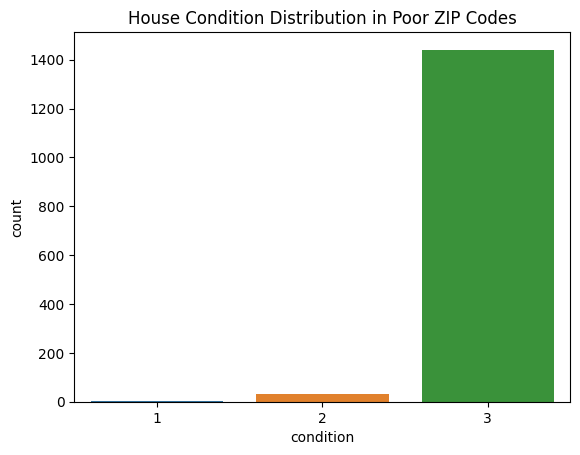

In [15]:
sns.countplot(candidates, x='condition')
plt.title("House Condition Distribution in Poor ZIP Codes")


<Axes: xlabel='zipcode', ylabel='price_per_sqft'>

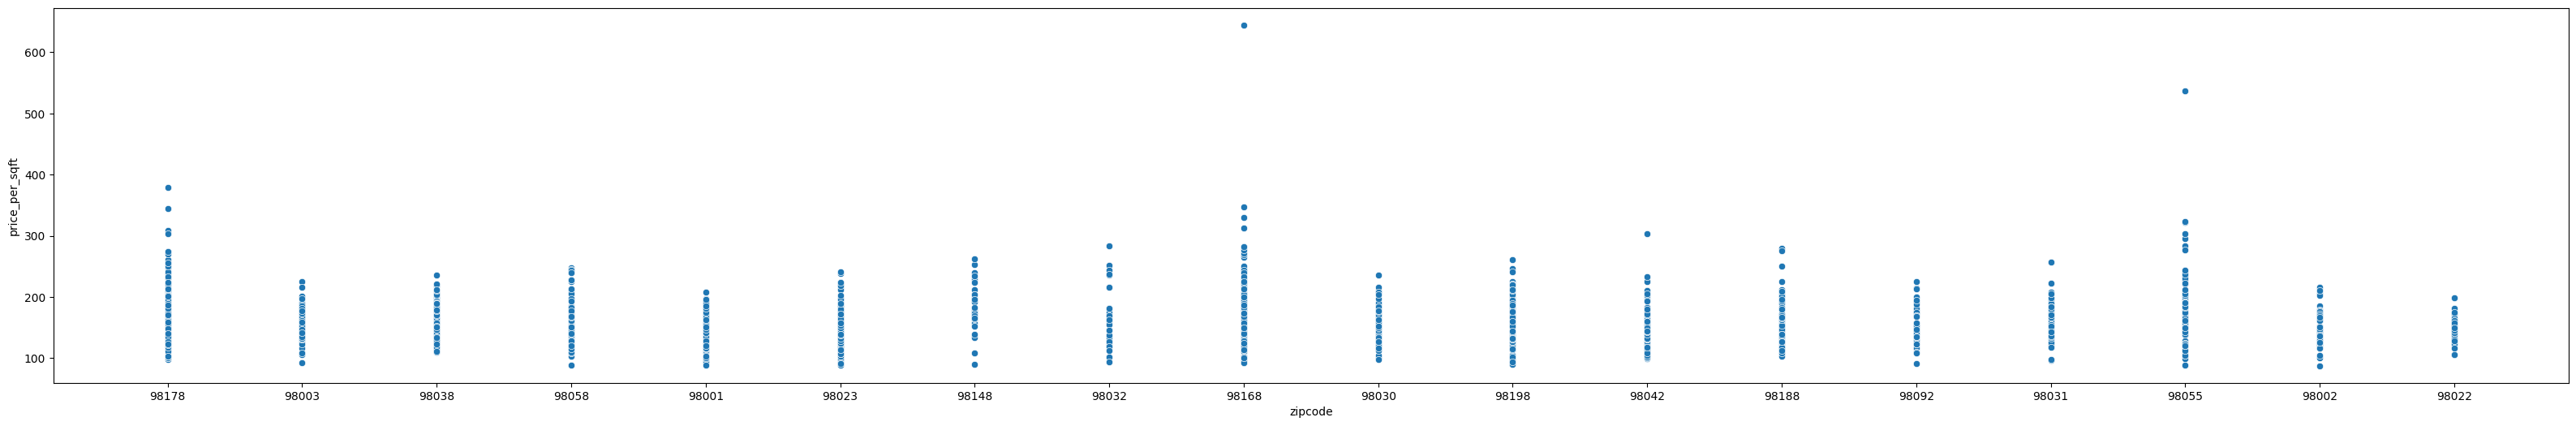

In [16]:
plt.figure(figsize=(40, 6))  # Set width=10, height=6 (in inches)
sns.scatterplot(candidates, x='zipcode', y='price_per_sqft')

At this point we need to determinate which houses can increase in value.

To do so, we need to determinate the new value they will acquire after the renovation. We assume that such value is the median of the price per sqft in the same zipcode

In [17]:
median_price_per_sqft_by_zip = df_analysis.groupby('zipcode')['price_per_sqft'].median()

# It creates a new column with an estimate potential resale value. The new value of the house is equal of sqft_living * the price_per_sqft
candidates['est_resale_price'] = (
    candidates['sqft_living'] * candidates['zipcode'].map(median_price_per_sqft_by_zip) # it multiplicate the sqft_living for the median of the price per sqft in the same zip code. Map return the index of the median value for that zipcode
)
candidates['est_resale_price']

0        213183.750751
5        265039.914955
7        323050.000000
28       356216.385241
32       178064.294108
             ...      
17588    149276.240586
17630    256379.146919
17635    344929.565627
17660    329856.807118
17677    297781.990521
Name: est_resale_price, Length: 1477, dtype: float64

At this point we need to estimate the profit for selling the house after the renovation.

We assume a cost of 300$ per square foot and we expect a profit of at least 10000$.

In [18]:
renovation_cost_per_sqft = 70  # Assuming a cost of 70$ per square foot
candidates['renovation_cost'] = candidates['sqft_living'] * renovation_cost_per_sqft

candidates['expected_profit'] = (
    candidates['est_resale_price'] - candidates['price'] - candidates['renovation_cost']
)
candidates['expected_profit']



0        -91316.249249
5       -112510.085045
7       -132250.000000
28      -110483.614759
32      -147335.705892
             ...      
17588   -171823.759414
17630   -146320.853081
17635   -153670.434373
17660   -170123.192882
17677   -103118.009479
Name: expected_profit, Length: 1477, dtype: float64

In [19]:
# Add a small profit requirement
min_profit = 10000  # set threshold
candidates_2 = candidates[candidates['expected_profit'] >= min_profit]
candidates_2

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,date,tot_sqft,price_per_sqft,poor_neighborhood,year_sold,est_resale_price,renovation_cost,expected_profit
1540,207000.0,2143700830,4.0,2.50,2100.0,19680.0,1.5,0,0.0,3,...,1340.0,12300.0,2014-10-06,21780.0,98.571429,True,2014,366125.294580,147000.0,12125.294580
1802,150000.0,4058802105,3.0,1.00,1450.0,6776.0,1.0,0,0.0,3,...,1680.0,7200.0,2014-09-04,8226.0,103.448276,True,2014,261963.083550,101500.0,10463.083550
1870,210000.0,522049104,5.0,1.75,2340.0,9148.0,2.0,1,0.0,3,...,1390.0,10019.0,2014-07-29,11488.0,89.743590,True,2014,405413.868613,163800.0,31613.868613
2290,199000.0,3352401981,4.0,2.00,2030.0,8120.0,2.0,0,0.0,3,...,1520.0,9440.0,2014-05-21,10150.0,98.029557,True,2014,366748.316971,142100.0,25648.316971
6521,200000.0,257000037,3.0,1.00,2120.0,31564.0,1.0,0,0.0,3,...,1790.0,11571.0,2014-12-29,33684.0,94.339623,True,2014,359934.065934,148400.0,11534.065934
6586,210000.0,3348401095,4.0,1.75,2090.0,6485.0,1.0,0,0.0,3,...,2190.0,9600.0,2015-04-27,8575.0,100.478469,True,2015,377588.168704,146300.0,21288.168704
7190,159075.0,7812800515,4.0,1.50,1580.0,6200.0,1.0,0,0.0,3,...,1320.0,6499.0,2014-10-25,7780.0,100.680380,True,2014,285449.428972,110600.0,15774.428972
7989,270000.0,2144800117,4.0,2.25,2600.0,9900.0,1.0,0,0.0,3,...,1770.0,11250.0,2014-06-26,12500.0,103.846154,True,2014,469726.908435,182000.0,17726.908435
8214,292050.0,5476800069,5.0,3.00,2840.0,7199.0,1.0,1,0.0,3,...,2210.0,10800.0,2014-05-27,10039.0,102.834507,True,2014,513086.315368,198800.0,22236.315368
8684,95000.0,6198400218,2.0,1.00,1070.0,20450.0,1.0,0,0.0,2,...,1360.0,15581.0,2014-09-19,21520.0,88.785047,True,2014,185025.015635,74900.0,15125.015635


In [20]:
profit_by_zip = candidates_2.groupby('zipcode')['expected_profit'].mean().reset_index()

# Sort by profit if desired
profit_by_zip = profit_by_zip.sort_values('expected_profit', ascending=False)


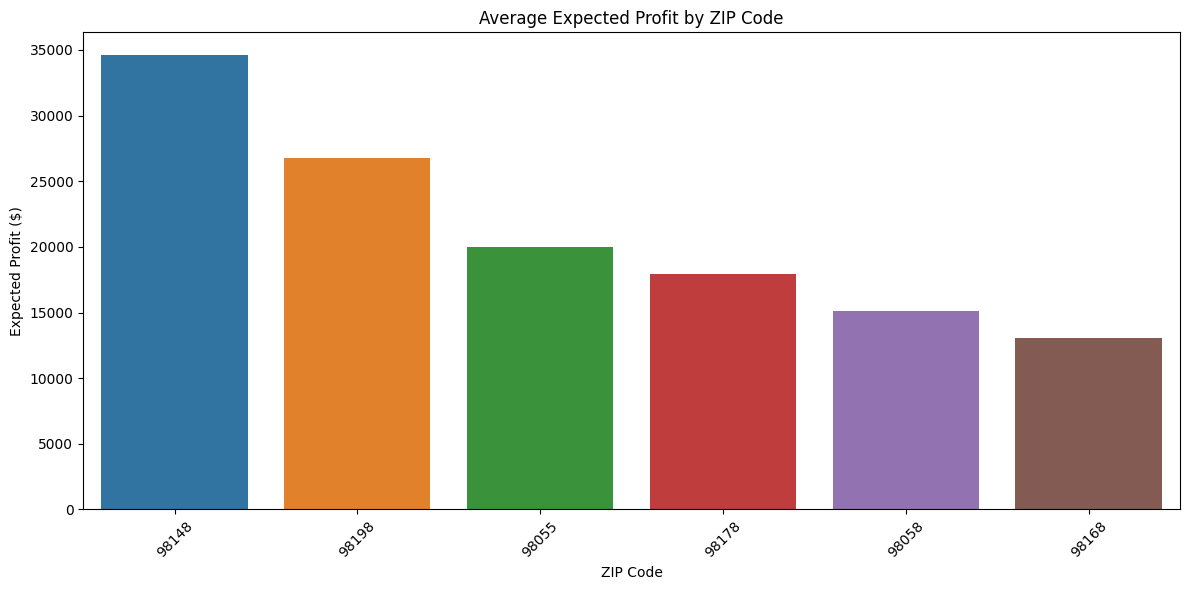

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=profit_by_zip, x='zipcode', y='expected_profit')
plt.title('Average Expected Profit by ZIP Code')
plt.ylabel('Expected Profit ($)')
plt.xlabel('ZIP Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

px.scatter_mapbox(candidates_2,
    lat="lat", lon="long",
    color="expected_profit",
    size="sqft_living",
    hover_data=["zipcode", "price", "expected_profit"],
    mapbox_style="carto-positron", zoom=10,
    title="Investment Candidates by Location"
)


<Axes: xlabel='price', ylabel='est_resale_price'>

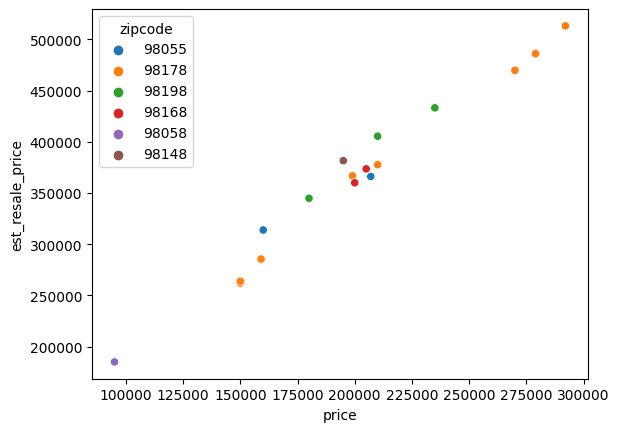

In [23]:
sns.scatterplot(data=candidates_2, x='price', y='est_resale_price', hue='zipcode')


<Axes: xlabel='renovation_cost', ylabel='expected_profit'>

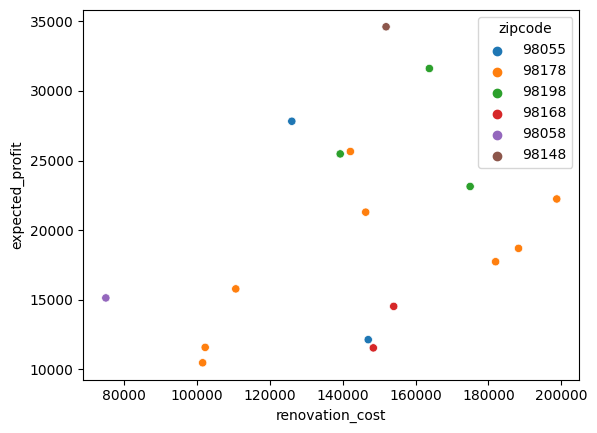

In [24]:
sns.scatterplot(data=candidates_2, x='renovation_cost', y='expected_profit', hue='zipcode')


<Axes: >

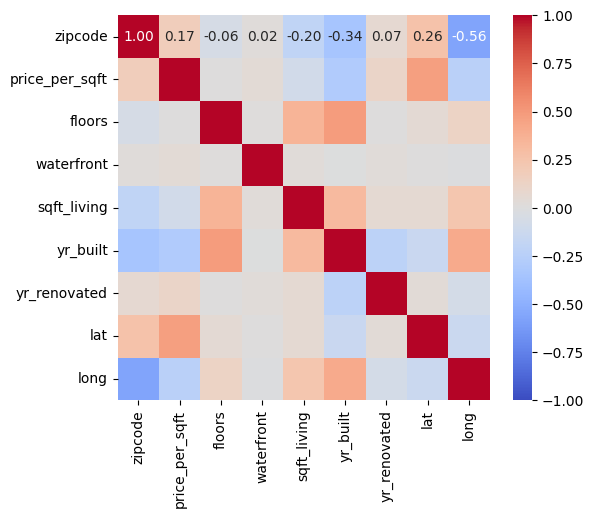

In [25]:
plt.figure(figsize=(6,5),dpi=100)
sns.heatmap(df_analysis[['zipcode','price_per_sqft','floors', 'waterfront','sqft_living', 'yr_built', 'yr_renovated','lat','long']].corr(), annot=True, fmt='.2f',cmap='coolwarm', vmin=-1,
    vmax=1)

In [26]:
plt.figure(figsize=(30, 6))
group_by_zipcode.plot(kind='bar')
plt.ylabel('price_per_sqft')
#plt.title('Average by Group')
plt.show()



NameError: name 'group_by_zipcode' is not defined

<Figure size 3000x600 with 0 Axes>

Assuming that the poor part of King county are the one where the price per sqft is than 40$/sqft, we can reduce

In [ ]:
import optbinning as op
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# statistics stack
from scipy import stats

# machine learning stack
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# miscellaneous
import warnings
warnings.simplefilter('ignore')

df=df_analysis.copy()

numerical_features = [
    'price_per_sqft','sqft_living'
]


categorical_features = [
    'zipcode','waterfront'
]

In [ ]:
def cat_num_correlation(df_,cat_col,num_col):
    """
    This function spits out a sensible correlation coefficient
    between a categorical column and a numerical column of a dataframe.
    The correlation is essentially the corrected Cramer's correlation statistic,
    after the numerical data points have been transformed under optimal binning
    """
    _df = df_.copy()
    class_number = _df[cat_col].nunique()
    binning = op.MulticlassOptimalBinning()
    _df['binned_feature'] =binning.fit_transform(_df[num_col], _df[cat_col])
    result = cat_cat_correlation(_df,cat_col,'binned_feature')
    return round(result,3)

In [ ]:
def cat_cat_correlation(df_,cat_col1,cat_col2):
    """
    This function spits out Cramer's correlation statistic, with Bergsma-Wicher 
    correction, between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df_[cat_col1], df_[cat_col2])
    chi_sqr = stats.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

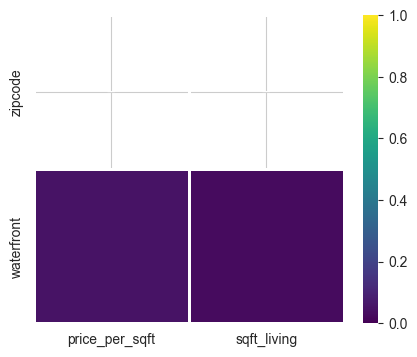

In [ ]:
cat_num_corr_values = dict(
    zip(
        numerical_features,
        [[cat_num_correlation(df,f1,f2) for f1 in categorical_features] for f2 in numerical_features]
    )
)

plt.figure(figsize=(5,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=cat_num_corr_values,index=categorical_features),
            cmap='viridis',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=0,
            vmax=1
           );